In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Reading Data
df: pd.DataFrame = pd.read_csv("IEA Global EV Data 2024.csv")

In [26]:
# Display the first few rows of the dataset
df.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000


In [36]:
# Display the summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12654 entries, 0 to 12653
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      12654 non-null  object 
 1   category    12654 non-null  object 
 2   parameter   12654 non-null  object 
 3   mode        12654 non-null  object 
 4   powertrain  12654 non-null  object 
 5   year        12654 non-null  int64  
 6   unit        12654 non-null  object 
 7   value       12654 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 791.0+ KB


In [51]:
# Check for missing values
df.isnull().sum()

region        0
category      0
parameter     0
mode          0
powertrain    0
year          0
unit          0
value         0
dtype: int64

In [59]:
# Electric Vehicles Sales
EV_df = df[(df['parameter'] == 'EV sales') & (df['category'] == 'Historical')]
# Remove all world occurrences
EV_df = EV_df[EV_df['region'] != 'World']

# Electric Vehicles Prediction Sales
EVP_df = df[((df['category'] == 'Projection-STEPS') | (df['category'] == 'Projection-APS')) & (df['parameter'] == 'EV sales')]

# Remove all world occurrences
EVP_df = EVP_df[EVP_df['region'] != 'World']

In [53]:
# All Sells Amount by Type of Vehicle E-Vehicles 2011-2023
cars_powertrain = {}
for powertrain in EV_df['powertrain'].unique():
    cars_powertrain[powertrain] = EV_df[EV_df['powertrain'] == powertrain]['value'].sum().astype(int)
cars_powertrain_df = pd.DataFrame(cars_powertrain.items(), columns=['Powertrain', 'Amount'])
cars_powertrain_df

,Powertrain,Amount
0,BEV,42915633
1,PHEV,20912032
2,FCEV,101715


In [54]:
# All Sells Amount by Type of Vehicle E-Vehicles 2011-2023
cars_type = {}
for car_type in EV_df['mode'].unique():
    cars_type[car_type] = EV_df[EV_df['mode'] == car_type]['value'].sum().astype(int)
cars_type_df = pd.DataFrame(cars_type.items(), columns=['Type', 'Amount'])
cars_type_df

,Type,Amount
0,Cars,60749388
1,Vans,2131770
2,Trucks,370434
3,Buses,677788


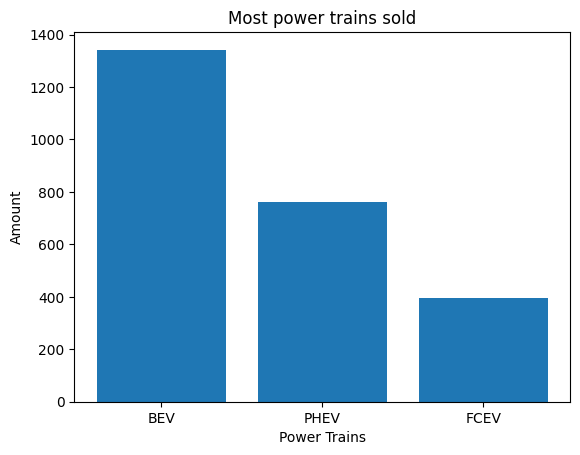

In [55]:
# Value Plot - Most power trains sold in E-Vehicles 2011-2023

fig, ax = plt.subplots()
ax.bar(power_trains_df.index, power_trains_df.values)
ax.set_xlabel('Power Trains')
ax.set_ylabel('Amount')
ax.set_title('Most power trains sold')
plt.show()

In [56]:
# Electric Vehicles Sells Historical and Prediction
ev = {}
ev_p = {}

for car_type in EV_df['mode'].unique():
    ev[car_type] = EV_df[EV_df['mode'] == car_type]['value'].sum()
    ev_p[car_type] = EVP_df[EVP_df['mode'] == car_type]['value'].sum()

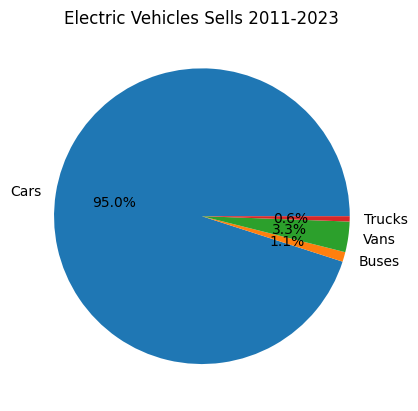

In [63]:
# Pie Chart - Electric Vehicles Sells 2011-2023 (Historical)

fig, ax = plt.subplots()
ax.pie([ev['Cars'], ev['Buses'], ev['Vans'], ev['Trucks']],
       labels=['Cars', 'Buses', 'Vans', 'Trucks'], autopct='%1.1f%%')
ax.set_title('Electric Vehicles Sells 2011-2023')
plt.show()

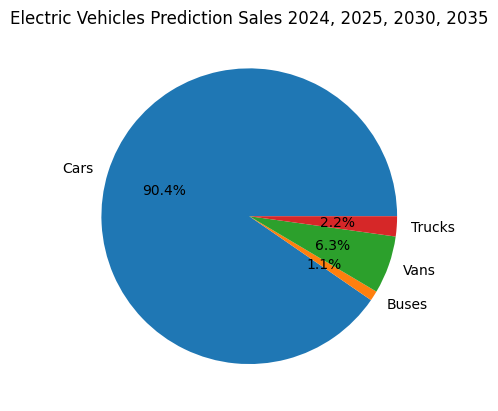

In [64]:
# Pie Chart - Electric Vehicles Prediction Sales 2024, 2025, 2030, 2035 (STEPS and APS)

fig, ax = plt.subplots()
ax.pie([ev_p['Cars'], ev_p['Buses'], ev_p['Vans'], ev_p['Trucks']],
       labels=['Cars', 'Buses', 'Vans', 'Trucks'], autopct='%1.1f%%')
ax.set_title('Electric Vehicles Prediction Sales 2024, 2025, 2030, 2035')
plt.show()

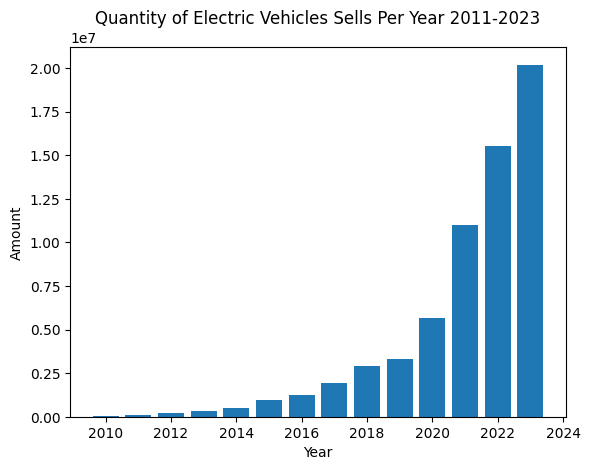

In [62]:
# Histogram - Quantity of Electric Vehicles Sells Per Year 2011-2023 (Historical)

e_vehicles_sells = {}
for year in EV_df['year'].unique():
    e_vehicles_sells[year] = EV_df[EV_df['year'] == year]['value'].sum()

fig, ax = plt.subplots()
ax.bar(e_vehicles_sells.keys(), e_vehicles_sells.values())
ax.set_xlabel('Year')
ax.set_ylabel('Amount')
ax.set_title('Quantity of Electric Vehicles Sells Per Year 2011-2023')
plt.show()

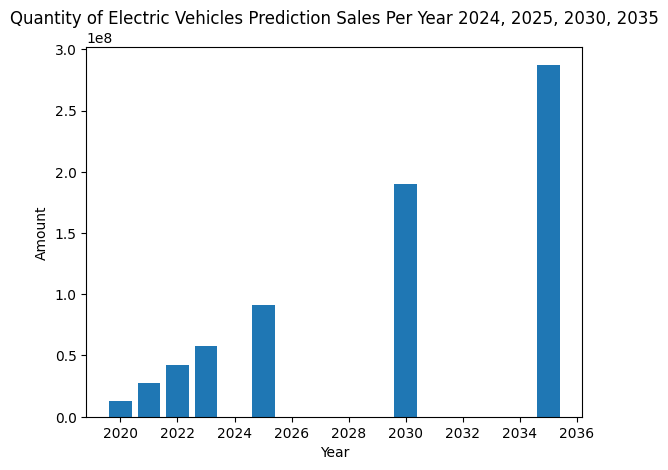

In [49]:
# Histogram - Quantity of Electric Vehicles Prediction Sales Per Year 2024, 2025, 2030, 2035 (STEPS and APS)

e_vehicles_prediction_sells = {}
for year in EVP_df['year'].unique():
    e_vehicles_prediction_sells[year] = EVP_df[EVP_df['year'] == year]['value'].sum()

fig, ax = plt.subplots()
ax.bar(e_vehicles_prediction_sells.keys(), e_vehicles_prediction_sells.values())
ax.set_xlabel('Year')
ax.set_ylabel('Amount')
ax.set_title('Quantity of Electric Vehicles Prediction Sales Per Year 2024, 2025, 2030, 2035')
plt.show()

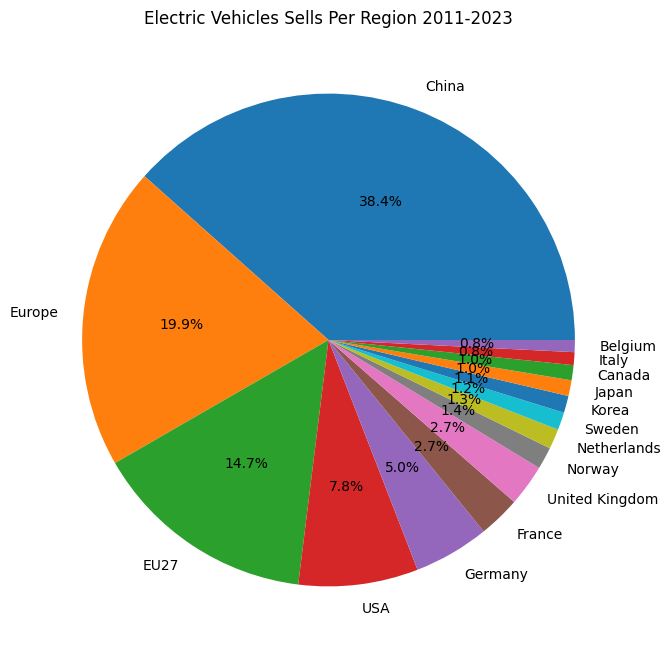

In [65]:
# Pie Chart - Electric Vehicles Sells Per Region 2011-2023 (Historical)

region_value_df = EV_df[EV_df['region'] != 'World']
region_value_df = region_value_df[['region', 'value']].groupby('region').sum()
region_value_df = region_value_df.sort_values('value', ascending=False)
region_value_df = region_value_df.head(15)
fig, ax = plt.subplots()
fig.set_size_inches(8, 8)
ax.pie(region_value_df['value'], labels=region_value_df.index, autopct='%1.1f%%')
ax.set_title('Electric Vehicles Sells Per Region 2011-2023')
plt.show()